# Improving Plots II - Bar charts and Boxplots

## Bar Charts

In Lesson 20, we saw that stratifying a bar chart by a second variable (i.e. sex) is not very straightforward with `matplotlib`, as it requires layering of several plots on top of one another. The good news is that, like we saw with scatterplots and line graphs, `seaborn` makes it easy for us to separate and color bar plots by secondary variables. Let's dive in to some examples. 


In [0]:
# import our packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We will be using the titanic dataset here. Let's load and preview it.

In [2]:
# read in titanic data
titanic = sns.load_dataset("titanic")
# preview data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Let's say we want to compare the mean fare price across the three classes of tickets for all passengers. 

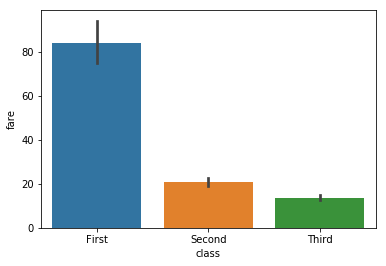

In [3]:
# barplot of class vs fare
sns.barplot(x="class", y = 'fare', data=titanic)

In `matplotlib` we had to manually compute the means and standard errors for the three classes before generating the bar plot. `seaborn` magically computes these and generates the plot exactly as we want without us even specifying! 

What if we wanted to look at the data more granularly and further stratify each class bar by the `sex` variable? Based on what you know about `seaborn` so far, how do you think we can do that?

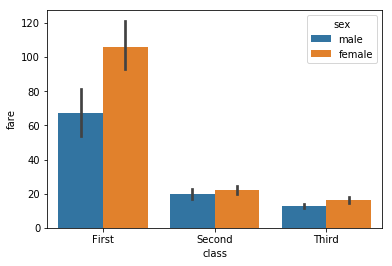

In [4]:
# barplot of class vs fare stratified by sex
sns.barplot(x="class", y = 'fare', hue = "sex", data=titanic)

Yup, you guessed it - our trusty `hue` parameter did the trick! 

What if we wanted to change the color palette?

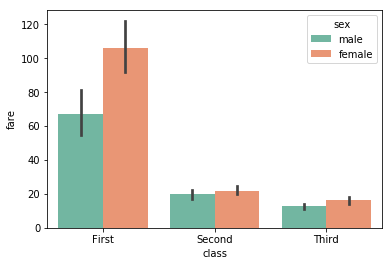

In [5]:
sns.barplot(x="class", y = 'fare', hue = "sex", palette = "Set2", data=titanic)

Right again! Are you starting to get the hang of `seaborn` by now?

Another trick we can do is flip the orientation of our bar plot by switching the order of our axes:

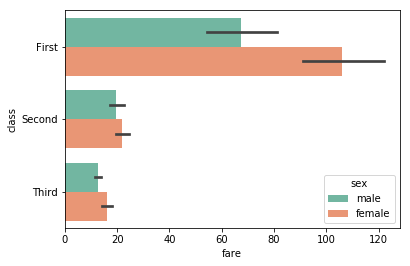

In [6]:
sns.barplot(y="class", x = 'fare', orient = "h", hue = "sex", palette = "Set2",  data=titanic)

# Count Plots

Earlier today we learned about histograms, which allow us to visualize the *distributions* of *continuous* variables - i.e. heights of people in a study. What if we want to learn about the distributions of categorical variables? This is where **count plots** come in. You can think of a count plot as the midpoint between a bar chart and a histogram. Let's look at an example with the categorical `class` variable.

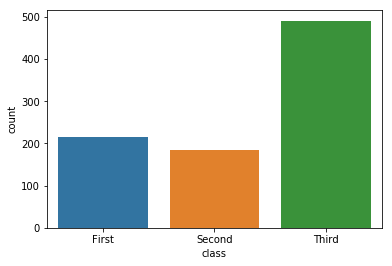

In [7]:
# count plot of class
sns.countplot(x="class", data=titanic)

Pretty simple right? You might notice that there are no errors bars here, as there are in our bar plots. This is because there is no *variability* in the count - it is a definitive value. 

You can also see that `seaborn` automatically colors by the x-axis variable (this happens with a simple bar chart too, as we saw above). If you want to override this behavior and set all the bars to the same color we can use the `color` parameter. (Here is a list of color keywords you can use with `seaborn`: https://python-graph-gallery.com/100-calling-a-color-with-seaborn/)

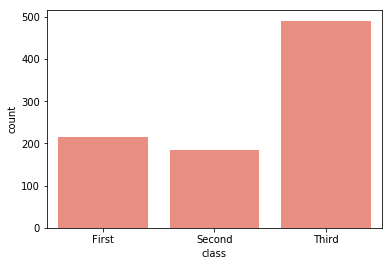

In [8]:
# count plot of class, salmon color bars
sns.countplot(x="class", color = 'salmon', data=titanic)

The `color` parameter works the same way in all the other plot types we've discussed as well: scatterplots, line graphs and bar charts. 

Now, let's stratify each class by the `sex` variable. By now you're an expert in this!

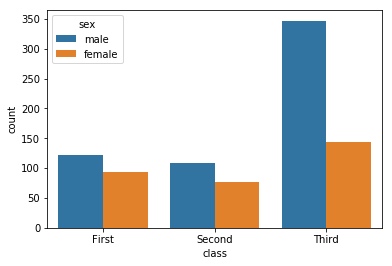

In [9]:
sns.countplot(x="class", hue = "sex",  data=titanic)

As always, we can change the color palette:

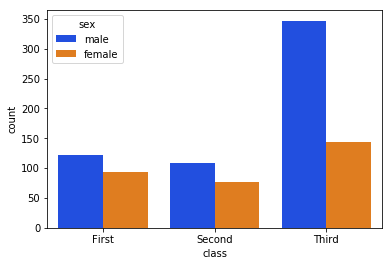

In [10]:
sns.countplot(x="class", hue = "sex", palette = "bright", data=titanic)

# Box Plots

If a histogram is a way to show the distribution of a single continuous variable, a **box plot** is how we *stratify* the distribution of a continuous variable (on the y-axis) by a categorical variable (on the x-axis). To illustrate, let's look at the distribution of age (continuous) across classes (categorical). We'll use the `catplot` function to generate this plot, and across our examples we'll see that this function is quite versatile.

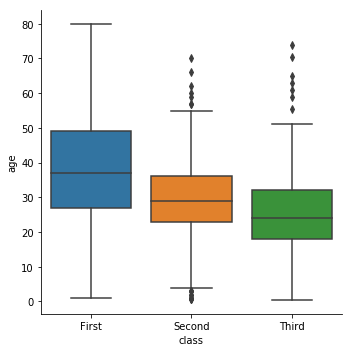

In [11]:
sns.catplot(x = "class", y="age", kind="box", data=titanic)

We interpret a boxplot as such: the middle line of each box shows the *median* of the data, which we learned yesterday shows the midpoint of our distribution. The bottom edge of each box corresponds to the *25th percentile* (meaning 25% of our data points are <= this value) and the top edge of each box corresponds to the *75th percentile* (meaning 75% of the data points are <= this value). In other words, the each box illustrates the middle 50% of the data. The error bars (or *whiskers* as they are commonly called) show the general spread of the rest of the distribution, and any individual points ourside of the whiskers are called *outliers*, meaning they are extremely different than the rest of the data.

Based on this boxplot, we can see that the lower the class, the younger the average age of that population. Also, we can see that the age of those in second and third class is generally less variable than that of first class passengers - since the box is wider and the whiskers are longer. 

Now that we understand box plots, let's learn how we can customize them! Let's test our favorite plot parameter by further stratifying each class by sex.

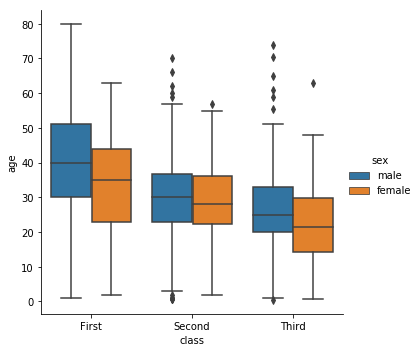

In [12]:
sns.catplot(x = "class", y="age", hue = 'sex', kind="box", data=titanic)

How would you interpret the results of this figure?

While the boxplot gives us some idea of the distribution of our data, there is a variation of this plot that can give us even more information about how the data points are distributed across the entire range of the variable. This is called a **boxen plot**, and to generate it all we need to do is change the `kind` parameter.

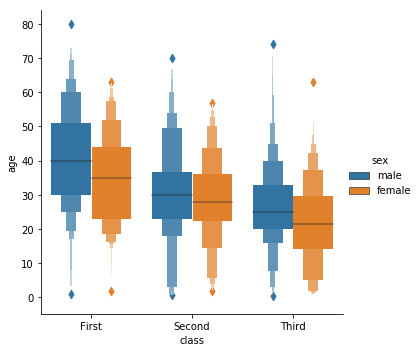

In [13]:
sns.catplot(x = "class", y="age", hue = 'sex', kind="boxen", data=titanic)

The boxen plot helps us visualize the spread of the data with the width of each segment. While the boxen plot gives us a little more information than a standard boxplot (and is perhaps more visually appealing), there is yet another variation of the boxplot that illustrates the distribution of our continuous variable even more explicitly - a **violin plot**. Again, to generate this plot we change the `kind` parameter

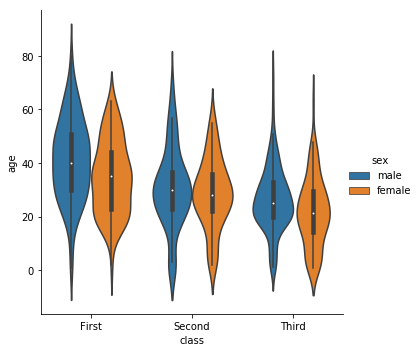

In [14]:
sns.catplot(x = "class", y="age", hue = 'sex', kind="violin", data=titanic)

You might have guessed this plot type gets its name from the vaguely violin-shaped distributions it produces. Reading a violin plot is fairly straightforward - the wider the plot the more data points that fall in that range. You might also have noticed that these violin plots are symmetric about the center line. When we are stratifying by a secondary variable that only has two categories, we can also set `split = True` to more easily compare between the two groups:

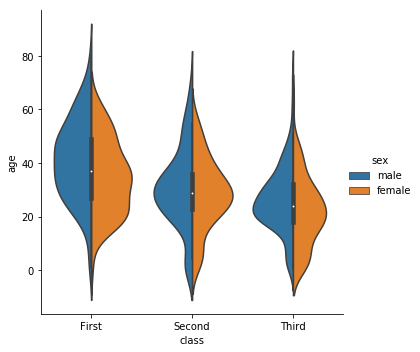

In [15]:
sns.catplot(x = "class", y="age", hue = 'sex', kind="violin", split=True, data=titanic)

This trick makes our plots more concise and easy to read, as well as enabling a better comparison between the stratifying groups (here male and female). 

In this lesson you learned how to:
* generate and customize **bar charts**
* visualize distributions of categorical variables using **count plots**
* read, interpret and generate **boxplots**
* several variations of boxplots, **boxen plots** and **violin plots**